In [10]:
from ramCOH.signal_processing import functions as f
import ramCOH.raman as ram
from ramCOH.signal_processing import curves as c
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
ol_file = "./olivine/PI081-05-04_2022_03_01_15_20_46_532nm_Edge_100�_x100_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

In [3]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(olivine.birs, smooth_factor=1)
olivine.calculate_noise()
olivine.noise

18.346426176191066

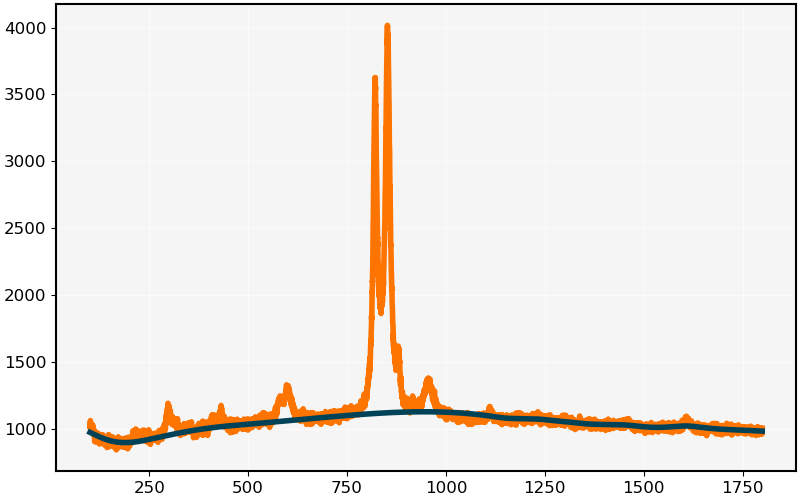

In [4]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.intensities["BC"])

plt.show()

In [7]:
olivine.deconvolve(noise_threshold=1.4)

max y: 239.0239376466052, range [184.76614024770976, 353.66947245610356], threshold: 1.1662557042790977
max y: 158.27830281392926, range [413.45463079233133, 449.8373692076687], threshold: 1.1506298793369518
max y: 268.0780646749897, range [450.04816507897345, 743.8818349210267], threshold: 1.1718782336422415
max y: 2893.7707720209833, range [785.8427656675435, 1042.480489954783], threshold: 1.6800000000000002
max y: 71.18472855535015, range [1090.0947256619752, 1132.0252743380247], threshold: 1.1337756066846842


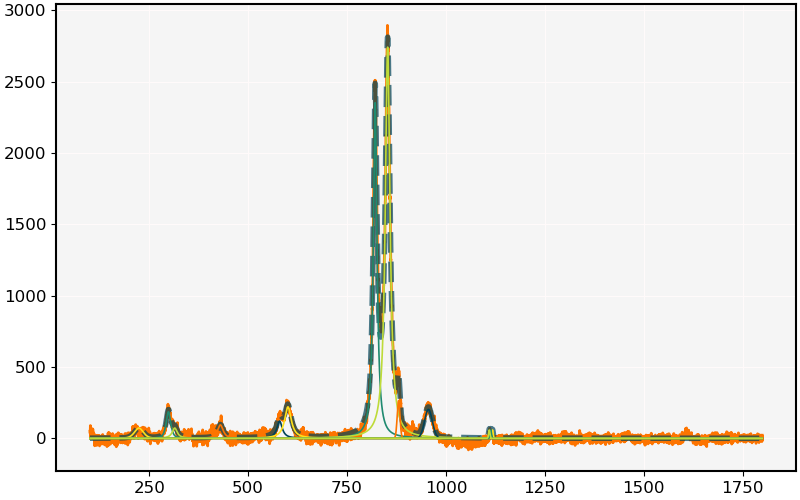

In [8]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, c.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [9]:
olivine.deconvolution_parameters

[array([ 223.76238503,  298.4168838 ,  314.35269089,  429.74600443,
         579.44669295,  600.58303051,  821.08084914,  852.66313567,
         880.30199329,  955.75372203, 1117.86071174, 1113.47606158,
        1109.6500973 ]),
 array([  72.23316389,  185.97644457,   72.23316389,   93.89213285,
         121.06748029,  220.37291525, 2352.04503832, 2741.5893205 ,
         263.28109009,  202.46854339,   58.33649119,   58.33649119,
          58.33649119]),
 array([11.6959555 ,  6.29405909,  7.66144508,  8.22204054,  8.13679363,
        10.03709687,  5.57936601,  7.18296588,  3.49003392,  9.71503036,
         1.68364865,  1.68364865,  1.68364865]),
 array([3.73839885e-01, 6.56019400e-01, 1.00000000e+00, 7.91413758e-01,
        1.00000000e+00, 9.78679103e-01, 9.74891627e-01, 1.00000000e+00,
        1.62101220e-10, 1.11437272e-13, 4.03658974e-24, 7.56583209e-29,
        3.50759580e-30]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]